# Day 9 - 2D & 3D movies

### Topics
 1. Intro to data & files
 1. Brief review -- planet data
 1. 2D Movies: Animations
 1. 3D movies (with `ipyvolume`)
     * simple orbit plots
     * 3D animations
     * `ipyvolume` + `ipywidgets`
     * export your 3D animation to a webpage
     * Bonus: animation + widgets

## Intro to data & files
Let's make some movies!

First, make sure you've downloaded **and unzipped** the zip file that stores the simulation data we are using today.  Link to this file [is right here](https://github.com/jnaiman/csci-p-14110_su2020/raw/master/lesson09/data.zip).  I recommend unzipping it 

This link was generated by running some simulations of a few of the planetary systems in the NASA exoplanet database.  See the [Extra notebook in this lesson](extra_notebook_generate_sims.ipynb) for more details.

We'll also make use of an additional library, [hermite_library.py](https://raw.githubusercontent.com/jnaiman/csci-p-14110_su2020/master/lesson09/hermite_library.py), to do some additional reading and writing of data, so make sure that is downloaded and in the same directory as this notebook file.

## Brief review -- planet data

Start by importing our usual things:

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets
#%matplotlib inline

Last time we did some info-viz type things with the planet dataset:

In [2]:
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv', 
                     sep=",", comment="#")

In [3]:
planets.head()

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.50000,1.00,-1.00,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0


And we made some beginning plots with this data (before we did some more complex stuff with `bqplot`):

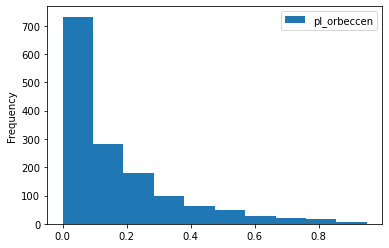

In [4]:
planets.plot(y='pl_orbeccen', kind='hist')

We know from our understanding of ellipses that things like eccentricity (along with others like semi-major axis) define the shape of the orbits of planets in these exoplanetary systems:

<img src="https://lh3.googleusercontent.com/proxy/GAwQoETXLFQ0EUb7JL1OnIZ-Uk--ctcIgjoVyzVuIshu7r1szxPkFIhH0POApb1-Ve5vqF1HFeIOMjcuk42swSB5pItm2FDrihf51E5bb9rtPzciFnK4" width=400>

We can use this information to do numerical simulations of these planetary orbits.  This was a big part of the last iteration of this class which you can see in lessons01-05 on [the Summer 2019 page](https://jnaiman.github.io/csci-p-14110_su2019/).  We will gloss over it now, but you can check out the [extra notebook for this week](extra_notebook_generate_sims.ipynb) if you are curious!.

What will use is simulations of several multi-planet systems from the NASA database.  Some creative license has been used to translate the NASA parameters into initial conditions for the simulation when data is missing.

## 2D movies

To start, let's check out the simulation data and make some quick plots.

To read in the data make sure the ```hermite_library.py``` file is located in the same directory were you are running this all from.

In [5]:
from hermite_library import read_hermite_solution_from_file # reader for sim data

Next, we have to choose what system we want to make a movie of.  Assuming the data directory has been downloaded and unzipped to the current directory, we can check out whats in it with a:

In [6]:
!ls data

55_Cnc-savedSim.txt     HD_215152-savedSim.txt  Kepler-411-savedSim.txt
DMPP-1-savedSim.txt     HD_219134-savedSim.txt  Kepler-62-savedSim.txt
GJ_3293-savedSim.txt    HD_34445-savedSim.txt   Kepler-79-savedSim.txt
GJ_667_C-savedSim.txt   HD_40307-savedSim.txt   Kepler-80-savedSim.txt
GJ_676_A-savedSim.txt   K2-266-savedSim.txt     Kepler-82-savedSim.txt
GJ_876-savedSim.txt     K2-285-savedSim.txt     TRAPPIST-1-savedSim.txt
HD_10180-savedSim.txt   KOI-94-savedSim.txt     WASP-47-savedSim.txt
HD_141399-savedSim.txt  Kepler-107-savedSim.txt myPlanetarySystem.txt
HD_160691-savedSim.txt  Kepler-11-savedSim.txt  tau_Cet-savedSim.txt
HD_20781-savedSim.txt   Kepler-20-savedSim.txt
HD_20794-savedSim.txt   Kepler-32-savedSim.txt


What is listed here are the simulated orbits for several different exoplanetary systems (plus a made-up one called "myPlanetarySystem.txt").  Let's pick one to read in and check out:

In [7]:
planet_file = 'data/Kepler-11-savedSim.txt'

t_h, E_h, r_h, v_h = read_hermite_solution_from_file(planet_file)

There are several outputs from the `read_hermite_solution_from_file` function.  The one we'll start looking at is `r_h` which gives the 3D vector that holds the positions of all the planets & central star at different timesteps in the simulation.

The order of this vector is:
```
r_h[planet number, index for x/y/z, time step]
```

The other outputs are:
 * `t_h` is the time at each timestep (in seconds)
 * `v_h` is the velocity of each planet/star in the system as a function of time (same format as `r_h`)
 * `E_h` gives the energy of the system as a function of time (if you have done a bit of physics you can check this to see how well energy is conserved and how much is lost to numerical artifacts)

Let's make a quick plot to see what this system looks like:

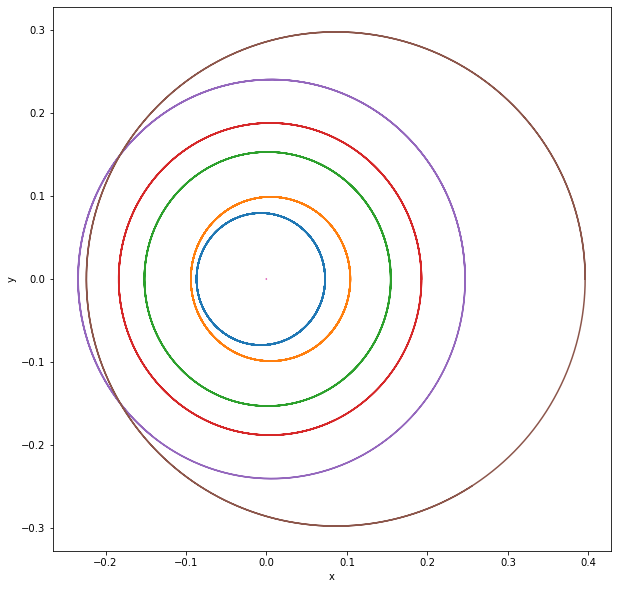

In [8]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 1, :])
    
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

So this is just plotting x vs. y, but what about the z-dimension?  Let's plot x vs z instead:

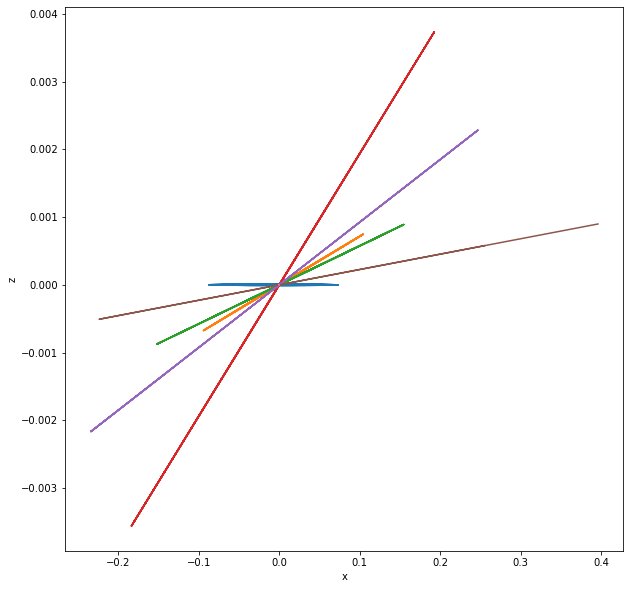

In [9]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 2nd (z) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 2, :])
    
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.show()

We can see that while there are orbits that go into x/y the magnitude of their x's (in AU, astronomical units) are very very small compared to their orbits in x/y.  So as expected, all of the orbits lie in a plane so this just looks like a straight line.

Fun questions:
 * is this true for all of the NASA systems?
 * what about my "by hand" planetary system?

We can also make a 1x3 plot that shows how everything varies with everything:

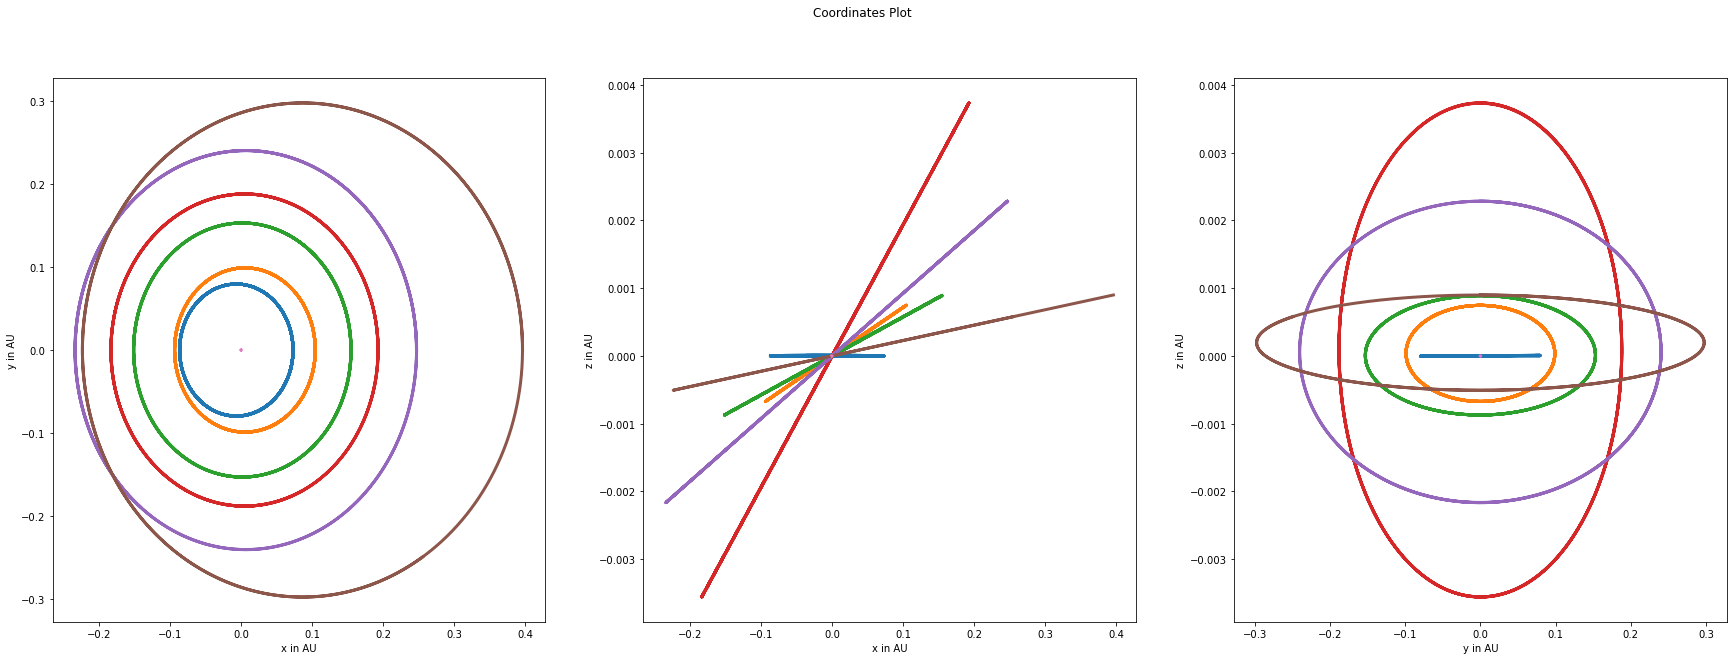

In [10]:
# we can test-replot like we did before:
fig, ax = plt.subplots(1, 3, figsize = (10*3, 10))
fig.suptitle('Coordinates Plot')

# set the labels along the horizontal (x)
#   and vertical axis
# **COMMENT ALL THESE**
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')

ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')

# plot Euler's solution, particle 1, x-y
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(r_h.shape[0]):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(r_h.shape[0]):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    

plt.show()

Note my system here is pretty 2D, your's might be very different!

## 2D Movies: Animations

How would we make an animation of this?  We will basically make "frames" of data - one for each timestep, or subset of times (more on that in a moment) and then plot this.  

Let's just do a face-on plot:

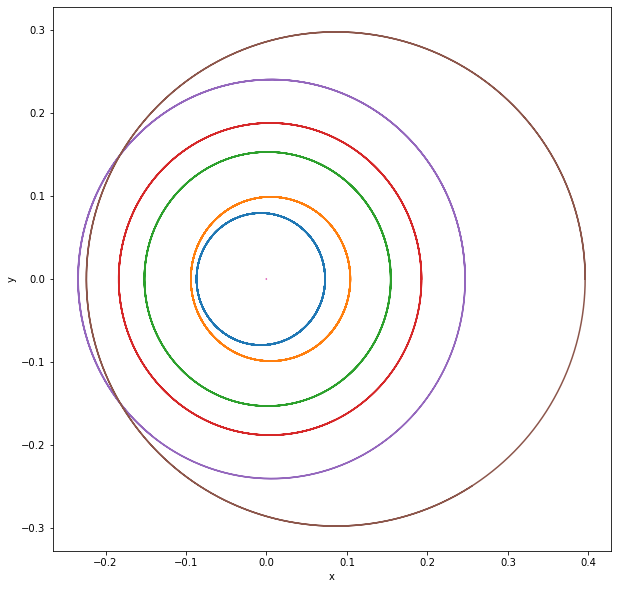

In [11]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 1, :])
    
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

To do an animation, let's start by importing some things we need.  This *may* be different on differenet systems & different versions of things.  I'll list a few options and then go through the one that works on my machine.

#### Using JSAnimation (old matplotlib)

You *may* have to install JSAnimation to get `animation` to import.  Try this first:

In [12]:
#!conda update matplotlib --yes

And if not try:

In [13]:
#!conda install -c conda-forge jsanimation --yes

or:

In [14]:
# if you get an error try:
#!pip install JSAnimation

#from JSAnimation.IPython_display import display_animation

In [15]:
from matplotlib import animation

So, we should expect that if we make a movie of this developing, this should be the final frame of our movie.

One thing we need to be aware of is that the more time steps we want to show, i.e. the number of `frames`, the longer it will take to generate this animation, and the longer it will take to save to a file.  So we are going to *subsample* our dataset for outputing purposes.

In [16]:
# plot how many steps?  i.e. every X number of steps?
# we probably don't want a huge movie with every step
stepSize = 50

In [17]:
# r_h[number of particles, number of coords, number of times]
# subsample
# we will subsample time with indexing like: start:stop:step
r = r_h[:,:,0:-1:stepSize]
t = t_h[0:-1:stepSize]
###E = E_h[0:-1:stepSize]

r.shape, r_h.shape

((7, 3, 176), (7, 3, 8800))

What do we think the last frame of our animation should look like?

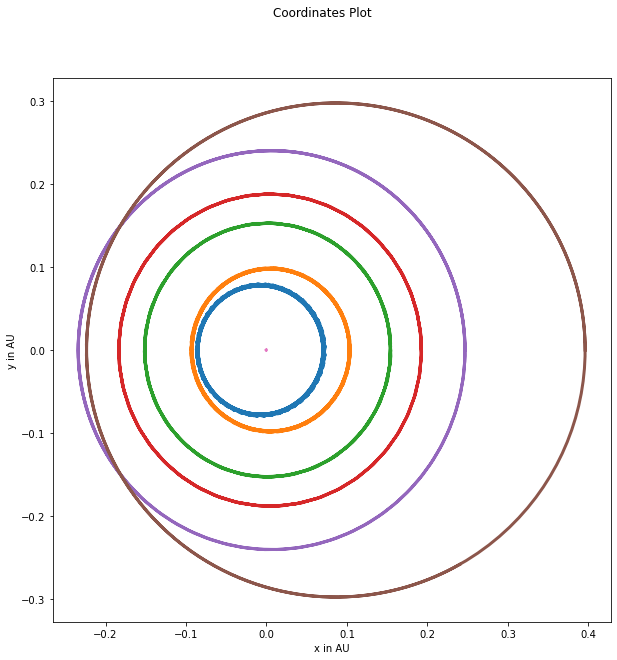

In [18]:
# let's plot!
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

# recall:
# r[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(r.shape[0]):
    ax.plot(r[i,0,:], r[i,1,:], lw=3)

plt.show()

Now that we have what we want to plot, let's use a library to import and make animations:

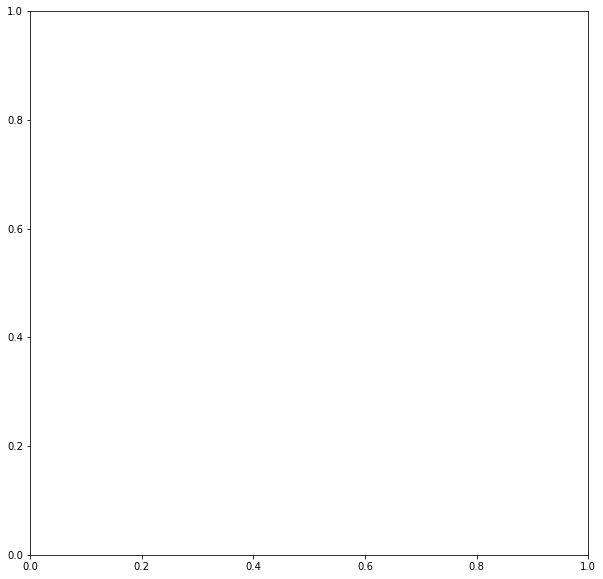

In [19]:
# initalize our figure
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# empty fig shows up

In [20]:
from animations_library import plot_animations

In [21]:
init, animate, nFrames = plot_animations(fig, ax, t, r)

Make animation:

In [22]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nFrames, interval=20, blit=True)

### Aside: 
You *may* be able to get in-line plots with some following: https://stackoverflow.com/questions/20624408/matplotlib-animating-multiple-lines-and-text

In [23]:
# if you get "TypeError: a bytes-like object is required, not 'str'"
#!conda update matplotlib --yes

In [24]:
#%matplotlib notebook

In [25]:
# call the animator.  blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=nFrames, interval=20, blit=True)
#plt.show()

In [26]:
# call our new function to display the animation
#display_animation(anim)
#anim

In [27]:
#display_animation?

### End aside

Let's save an mp4 of our animation and then upload it an display inline.

In [27]:
anim.save?

In [28]:
#Can try saving to a gif:
#anim.save('myAnimation.gif', writer='imagemagick')
#anim.save('myAnimation.gif')

We want to tell Python how to translate from `matplotlib` animation to a movie file.  We can do this by specifying a "writer":

In [ ]:
# note: if you get a "ffmpeg not found" error try:

# I think its this one 
#  you might have to restart kernel after this
#!conda install -c conda-forge ffmpeg --yes 

# you can also install imagemagick or use it as a writer!

In [28]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [29]:
# save!
anim.save('anim.mp4', writer=writer)

Than we can import and show as a Video in-line:

In [30]:
from IPython.display import Video

In [31]:
#Video("anim.mp4")
Video("anim.mp4",width=800)

Ok, the above is pretty neat (looks cool with the short number of frames we have here).  The reason it looks so choppy is because we are only using one out of every 50 time steps.  You can see that already we are mis-leading our viewer, but we might want to start this way because higher resolution animations will take longer to run.  

### Optional Exercise
Repeat making movies using this method for your own system.  

**Optional**: modifyin the plotting library code

Try different x/y/z combinations or make a 1x4 plot like we did with still images.  Think about any symbols you want to add - arrows? How would you add a dot to show where the planet is? (Hint: google "matplotlib marker styles")

Hint: start with one change - how would you change the colors of the plots?  If you wanted to figure out how to plot different symbols, how would you do that?

**Note**: for this you will have to modify the library code and then re-import your the library by doing *Kernel -> Restart+Run all* 

You can also just copy-paste the code in your notebook and go from there.

## 3D movies (with `ipyvolume`)

Let's extend this to 3D!  We'll use the current sim to do this.

### Simple orbit plots

First, let's read in `ipyvolume`:

In [32]:
import ipyvolume

Let's make a quick scatter plot with random data to see what this does:

In [33]:
x, y, z = np.random.random((3, 10000)) # 3 dimensions, 10k points total
ipyvolume.quickscatter(x, y, z, size=1, marker="sphere")

Easy peasy!  Let's read in our simulation data and plot this!  

There are some formatting issues that we have to take care of and we'll use `.ravel` to do this to take this:

In [34]:
r_h[:,0,:]

array([[-8.69460729e-02, -8.69427997e-02, -8.69329803e-02, ...,
        -3.31854767e-02, -3.39073377e-02, -3.46261789e-02],
       [ 1.04174259e-01,  1.04171983e-01,  1.04165156e-01, ...,
         1.03227668e-01,  1.03309561e-01,  1.03386910e-01],
       [ 1.54336367e-01,  1.54335330e-01,  1.54332219e-01, ...,
         5.29853632e-02,  5.24517034e-02,  5.19173289e-02],
       ...,
       [ 2.46698370e-01,  2.46697964e-01,  2.46696746e-01, ...,
        -1.43108951e-01, -1.42747687e-01, -1.42385888e-01],
       [ 3.96057908e-01,  3.96057750e-01,  3.96057277e-01, ...,
         2.54543441e-01,  2.54834593e-01,  2.55125468e-01],
       [-4.10728807e-05, -4.10728251e-05, -4.10726584e-05, ...,
        -2.30013480e-05, -2.30219366e-05, -2.30424531e-05]])

to this:

In [35]:
r_h[:,0,:].ravel()

array([-8.69460729e-02, -8.69427997e-02, -8.69329803e-02, ...,
       -2.30013480e-05, -2.30219366e-05, -2.30424531e-05])

This formatting will help all the points to be the same color.  (Its totally fine if you're at like 30% with this formatting stuff at this point).

In [36]:
x = r_h[:,0,:].ravel()
y = r_h[:,1,:].ravel()
z = r_h[:,2,:].ravel()

In [37]:
ipyvolume.quickscatter(x, y, z, 
                       size=1, marker="sphere")

We are seeing *all* of the points of the sim all at once which is why we get like lines in 3D space.

Let's make things a little more complicated and allow us to take a look at each orbit with a different color:

In [38]:
print(r_h.shape)

(7, 3, 8800)


This tells us we have 7 planets so we'll need 7 colors.

In [39]:
ipyvolume.figure()
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'brown', 'magenta'] # color of each particle
for i in range(r_h.shape[0]): # loop over particles
    ipyvolume.scatter(r_h[i,0,:],
                      r_h[i,1,:],
                      r_h[i,2,:], 
                      color=colors[i], 
                     marker='sphere')
ipyvolume.show()
# now all of the orbits are different colors

So, this is pretty cool - we can now see how the orbits "precess" during their evolution and we can check out these shapes in 3D.

Note we can also plot more abstract spaces in 3D - like velocity space:

In [40]:
v_h # velocity in km/s

array([[[ 0.00000000e+00,  1.20927258e-02,  2.41847815e-02, ...,
         -1.33620429e+00, -1.33067876e+00, -1.32504752e+00],
        [-1.33060676e+00, -1.33055665e+00, -1.33040631e+00, ...,
         -4.61760957e-01, -4.74119651e-01, -4.86407636e-01],
        [ 0.00000000e+00,  6.94019789e-10,  1.38817720e-09, ...,
         -3.34160913e-05, -3.47256746e-05, -3.60291908e-05]],

       [[-0.00000000e+00, -8.40720509e-03, -1.68140996e-02, ...,
          1.55471131e-01,  1.47080032e-01,  1.38683611e-01],
        [ 1.23905370e+00,  1.23902663e+00,  1.23894544e+00, ...,
          1.23195679e+00,  1.23292550e+00,  1.23383987e+00],
        [ 0.00000000e+00, -6.01580063e-05, -1.20313791e-04, ...,
          1.04642347e-03,  9.86265837e-04,  9.26073046e-04]],

       [[-0.00000000e+00, -3.83059547e-03, -7.66114071e-03, ...,
         -9.85134012e-01, -9.86460991e-01, -9.87774677e-01],
        [ 1.04102183e+00,  1.04101484e+00,  1.04099385e+00, ...,
          3.51039339e-01,  3.47407334e-01,  3.437

In [41]:
ipyvolume.figure()
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'brown', 'magenta'] # color of each particle
for i in range(v_h.shape[0]): # loop over number of particles
    ipyvolume.scatter(v_h[i,0,:],
                      v_h[i,1,:],
                      v_h[i,2,:], 
                      color=colors[i],
                     marker='sphere')
ipyvolume.show()

So this is a little less intiative, but this is how the velocities of our particles change during their orbits.

Ok, we can also show velocity by little vectors:

In [42]:
ipyvolume.figure()
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'brown', 'magenta'] # color of each particle
for i in range(v_h.shape[0]): # loop over particles 
    ipyvolume.quiver(r_h[i,0,:], # plot x,y,z positions
                      r_h[i,1,:],
                      r_h[i,2,:],
                     v_h[i,0,:], # also include vx/vy/vz vectors of velocities
                      v_h[i,1,:],
                      v_h[i,2,:], 
                      color=colors[i])
ipyvolume.show()

So clearly the above is pointless - while it looks cool the arrows are too big and there are too many of them!  We can change this by taking "X" number of points.  This is like the subsampling we did before to keep our framerates of our animations small:

In [43]:
step = 1000 # plot ever "step"th velocity vector
# also, length of arrays in time-axis
N = v_h.shape[2]

ipyvolume.figure()
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'brown', 'magenta'] # color of each particle
for i in range(v_h.shape[0]): # loop every particle
    ipyvolume.quiver(r_h[i,0,0:N:step], # plot subsampled x/y/z
                      r_h[i,1,0:N:step],
                      r_h[i,2,0:N:step],
                     v_h[i,0,0:N:step], # with subsampled vectors vx/vy/vz
                      v_h[i,1,0:N:step],
                      v_h[i,2,0:N:step], 
                      color=colors[i], 
                     size=2) # also, if things look too crowded, we can also make the arrows themselves smaller
ipyvolume.show()

Now we can see a bit more about the motion - that their directions are opposite of eachother for example.  And that the central mass only moves slightly and around its center as well.

### 3D animations

Let's now figure out how to make an animation in 3D, and then save it for ourselves!  To do this, we'll need to format our data specifically as [time, position].  This is yet another example of where a lot of data-viz is data-formatting!

Onto formatting our data as [time, position], we'll do this with a `.T` function that "flips" our data shape.  `.T` stands for "transposing":

In [47]:
# for example, for particle 0:
print(r_h[:,0,:].shape, r_h[:,0,:].T.shape)

(7, 8800) (8800, 7)


Down sample our velocity data for easier plotting:

In [48]:
step = 10 # only do every 10 steps
# also, length of arrays in time
N = v_h.shape[2]

# subsample to make more managable
r = r_h[:,:,0:N:step]
v = v_h[:,:,0:N:step]

print(r_h.shape, r.shape, r[:,2,:].T.shape)

(7, 3, 8800) (7, 3, 880) (880, 7)


Now let's pick some colors.  Again, we have 7 objects so we need 7 colors.  We'll use RGB triplets for animations between 0-1:

In [49]:
color = [(1,0,0), (0,0,1), (0,1,0), (0,1,1), (1,1,0), (1,0,1), (0.5, 0.5, 0.5)]

We need to format the colors into a shape that gives a color at each timestep.  We'll do this with a little `flip_colors` function:

In [50]:
# import little function to do colors for us
from flip_colors import flip_colors

colors = flip_colors(color,r)

print(colors.shape, r.shape)

(880, 7, 3) (7, 3, 880)


Putting all of these ideas together, let's finally plot!

In [51]:
ipyvolume.figure()

s = ipyvolume.scatter(r[:,0,:].T, r[:,1,:].T, r[:,2,:].T, 
                      marker='sphere', 
                     color=colors)

ani = ipyvolume.animation_control(s, interval=200)

ipyvolume.show()

Note that we can only use the ```animation_control``` function on scatter plots or quiver plots, so we can't add lines or anything here.  Perhaps in a future release of ```ipyvolume```!

#### Optional Exercise
Try this with your own datasets!

Bonus: also try with animations of quiver plots

Bonus: is there anything else you want to animate? Should the size of the points change for example? (See ipyvolume docs for examples)


### ipyvolume + ipywidgets

Now let's combine the powers of widgets and ipyvolume to explore our datasets in 3D.

Let's only plot a few points on a scatter plot:

In [53]:
step = 100 # only do every 100th timestep
# also, length of arrays
N = v_h.shape[2] # full time

# decimate again
r = r_h[:,:,0:N:step]
v = v_h[:,:,0:N:step]

Let's format for our scatter plot again:

In [54]:
x = r[:,0,:].ravel()
y = r[:,1,:].ravel()
z = r[:,2,:].ravel()

Reconstruct our scatter plot with every 100th point:

In [56]:
ipyvolume.figure()

s = ipyvolume.scatter(x, y, z, 
                      marker='sphere')

ipyvolume.show()

Now let's create this plot but we won't show it:

In [57]:
ipyvolume.figure()

s = ipyvolume.scatter(x, y, z, 
                      marker='sphere')

We can link widgets to ths to control the size & color of our points.  Let's use a `FloatSlider` widget and a `ColorPicker` widget:

In [58]:
size = ipywidgets.FloatSlider(min=0, max=30, step=0.1)
color = ipywidgets.ColorPicker()

In [59]:
size

FloatSlider(value=0.0, max=30.0)

In [60]:
color

ColorPicker(value='black')

In [61]:
size.value

0.0

In [63]:
color.value

'#a41e1e'

Now we'll use a widget function we haven't used before called `jslink`.  With this we can link attributes of our scatter plot like the scatter *size* and *color* with the *value*s of each of our widgets:

In [64]:
s.size

array(2)

In [65]:
s.color

array('red', dtype='<U3')

In [66]:
ipywidgets.jslink((s, 'size'), (size, 'value'))
ipywidgets.jslink((s, 'color'), (color, 'value'))

Link(source=(Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', line_material=ShaderMaterial(),…

Finally, well put all these things in a column - our plot, then our two linked widgets:

In [67]:
ipywidgets.VBox([ipyvolume.gcc(), size,  color])

### Optional Exercise
Repeat this ipywidgets+ipyvolume for your own system.

Bonus: make different sliders for different planets to control size & color for each independently.

Bonus: make a quiver plot

Bonus: what other things can you think to add sliders/pickers for?  Hint: check out the docs for ```ipyvolume.quiver``` and ```ipyvolume.scatter``` to see what you can change.

### export your 3D animation to a webpage

Finally, we might want to embed our creations on the web somewhere.  The first step is to make an ```html``` file from our in-python widgets.  Luckily, there is a function for that!  Instead of displaying our `VBox`, let's save it as an object:

In [68]:
myVBox = ipywidgets.VBox([ipyvolume.gcc(), size,  color])

Now we'll need to do a few layout things so that the box won't be super small on our embedded webpage (try it without and see what happens!)

In [69]:
ipyvolume.embed.layout = myVBox.children[1].layout
ipyvolume.embed.layout.min_width = "400px"

Finally we'll "embed" our interactive plot within a webpage:

In [70]:
# NOTE!!!! offline=True may or may not work... depends
ipyvolume.embed.embed_html("myPage.html", myVBox, offline=False, devmode=False)

This webpage is locally stored, but you can open it up in your default browser with (on a Mac):

In [71]:
!open myPage.html

In windows this [is likely](https://stackoverflow.com/questions/501290/windows-equivalent-of-the-mac-os-x-open-command) the following:

```
!start "" "myPage.html"
```

#### Optional Exercise: Make your own controls & Deploy to GitHub pages

Generate a page for your own simulation with all the controls you want!

**Bonus**: though we won't be covering it explicitly, you can actually deploy this to the web to be hosted on github pages. 

See the [Optional Lecture on deploying to GitHub](https://jnaiman.github.io/csci-p-14110_su2020/lesson09/lecture09_optional_github.html?showNotes=false) and check out [the GitHub pages page](https://pages.github.com/) for an overview.

The first thing you need to do is call ```embed``` in a very specific way:
 
```python
ipyvolume.embed.embed_html("myPage.html", myVBox, offline=False, devmode=False)
```

Now, instead of opening it here, you need to add this file to your github page.  Again, we won't cover this in class, but feel free to ask for help after you've looked over the resources provided on today's course webpage under the "deploying to the web" header.

**Bonus**: add more linkage to your plot by linking to bqplot.  See the "Mixing ipyvolume with bqplot" example on the ```ipyvolume``` docs: https://ipyvolume.readthedocs.io/en/latest/bqplot.html#

### Bonus: animation + widgets

This is just the code for how this looks feel free to poke around at it if you are interested!

First, a test plot:

In [72]:
step = 10 # only do every 10th timestep
# also, length of arrays
N = r_h.shape[2] # full time
# decimate again
r = r_h[:,:,0:N:step]


ipyvolume.figure()

size = ipywidgets.FloatSlider(min=0, max=30, step=0.1, description='Size of Planets')

s = ipyvolume.scatter(r[:,0,:].T, r[:,1,:].T, r[:,2,:].T, 
                      marker='sphere', 
                     color=colors)

ipywidgets.jslink((s, 'size'), (size, 'value'))
ani = ipyvolume.animation_control(s, interval=200)
ipywidgets.VBox([ipyvolume.gcc(), size])

Save with animation:

In [73]:
ipyvolume.figure()

size = ipywidgets.FloatSlider(min=0, max=30, step=0.1, description='Size of Planets')

s = ipyvolume.scatter(r[:,0,:].T, r[:,1,:].T, r[:,2,:].T, 
                      marker='sphere', 
                     color=colors)

ipywidgets.jslink((s, 'size'), (size, 'value'))
ani = ipyvolume.animation_control(s, interval=200)

# export to web
myVboxOut = ipywidgets.VBox([ipyvolume.gcc(), size])
# if we don't do this, the plot will be really tiny in the standalone html
ipyvolume.embed.layout = myVboxOut.children[1].layout
ipyvolume.embed.layout.min_width = "400px"
ipyvolume.embed.embed_html("myPage_withAni.html", myVboxOut, offline=False, devmode=False)

Check it out:

In [74]:
!open myPage_withAni.html